In [2]:
!pip install -U graphviz scikit-learn neptune-xgboost xgboost hyperopt mlflow deepchecks
!pip install -U "neptune[xgboost]"

  Using cached scikit_learn-1.4.0-1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
  Using cached scikit_learn-1.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.8 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [3]:
import pandas as pd
import numpy as np
from google.colab import drive
import os

In [4]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## **READING AND MERGING DATA**

In [5]:
# SPECIFY THE FILE PATH OF THE EXCEL FILE CONTAINING THE DATASET
path = '/content/gdrive/MyDrive/ML Projects/Loan Default Prediction Using ML Models/Credit_Risk_Dataset.xlsx'

# CALL THE FUNCTION TO READ THE EXCEL DATA
sheet_names = ['loan_information', 'Employment', 'Personal_information', 'Other_information']

loan_information = pd.read_excel(path, 'loan_information')
employment = pd.read_excel(path, 'Employment')
personal_information = pd.read_excel(path, 'Personal_information')
other_information = pd.read_excel(path, 'Other_information')

In [6]:
# Merge 'loan information' and 'Employment' dataframes based on User_id
merged_df = pd.merge(loan_information, employment, left_on='User_id', right_on='User id')

# Merge the previously merged dataframe with 'personal information' based on 'User_id'
merged_df = pd.merge(merged_df, personal_information, left_on='User_id', right_on='User id')

# Merge the previously merged dataframe with 'other information' based on 'User_id'
merged_df = pd.merge(merged_df, other_information, left_on='User_id', right_on='User_id')

df = merged_df

# Display the first few rows of the merged dataframe
df.head()


,User_id,Loan Category,Amount,Interest Rate,Tenure(years),User id_x,Employmet type,Tier of Employment,Industry,Role,...,Home,Pincode,Social Profile,Is_verified,Delinq_2yrs,Total Payement,Received Principal,Interest Received,Number of loans,Defaulter
0,7013527,Consolidation,55884.0,11.84,6,7013527,Salaried,B,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGAZSEWdkcndwkcnCCM,...,rent,XX852X,No,NaN,0,1824.150000,971.46,852.69,0,1
1,7014291,Consolidation,55511.0,16.94,4,7014291,Self - Employeed,D,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGNCSEWdkcndwkcnCCM,...,mortgage,XX286X,NaN,Source Verified,0,22912.532998,18000.00,4912.53,0,0
2,7014327,Consolidation,12289.0,11.84,6,7014327,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGNYSEWdkcndwkcnCCM,...,own,XX113X,No,NaN,0,7800.440000,4489.76,3310.68,0,1
3,7014304,Credit Card,29324.0,14.71,4,7014304,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGCASEWdkcndwkcnCCM,...,rent,XX941X,Yes,NaN,0,6672.050000,5212.29,1459.76,0,0
4,7031995,Credit Card,30252.0,14.71,4,7031995,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGCASEWdkcndwkcnCCM,...,rent,XX913X,No,Verified,0,11793.001345,10000.00,1793.00,0,0


# **EXPLORATORY DATA ANALYSIS AND DATA PREPARATION**

**GOAL TO UNDERSTAND:**


*   **Identify data types of each column**
*   **Understand basic statistics of all numerical columns**
*   **Check Missing Values**
*   **Plan for Handling Missing Values**
--------------------------------------------------------------------------------
*   **Analyze the distribution of each column**
*   **Assess the quality of data based on the distribution**
*   **Identify any skewness in the data**
*   **Investigate the reasons behind data skewness**
--------------------------------------------------------------------------------
*   **Identify and handle categorical values**
*   **Identify and handle ordinal features**
--------------------------------------------------------------------------------
*   **Examine the correlation between different numeric variables**
*   **Examine the correlation between categorical variables**
--------------------------------------------------------------------------------
*   **Fix data imbalance**









In [7]:
# Display data types for each column in the dataframe. Goal is to see if there is any column with the wrong data type
df.dtypes

User_id                 int64
Loan Category          object
Amount                float64
Interest Rate         float64
Tenure(years)           int64
User id_x               int64
Employmet type         object
Tier of Employment     object
Industry               object
Role                   object
Work Experience        object
Total Income(PA)      float64
User id_y               int64
Gender                 object
Married                object
Dependents              int64
Home                   object
Pincode                object
Social Profile         object
Is_verified            object
Delinq_2yrs             int64
Total Payement        float64
Received Principal    float64
Interest Received     float64
Number of loans         int64
Defaulter               int64
dtype: object

In [8]:
# Use of describe pandas function to learn basic statistics of all numerical columns in our DataFrame
df.describe()

,User_id,Amount,Interest Rate,Tenure(years),User id_x,Total Income(PA),User id_y,Dependents,Delinq_2yrs,Total Payement,Received Principal,Interest Received,Number of loans,Defaulter
count,1.437270e+05,1.118030e+05,143727.000000,143727.000000,1.437270e+05,1.437270e+05,1.437270e+05,143727.000000,143727.000000,143727.000000,143727.000000,143727.000000,143727.000000,143727.000000
mean,3.733474e+07,1.376458e+05,12.038703,4.514503,3.733474e+07,7.242256e+04,3.733474e+07,1.997113,0.276601,10840.882025,8407.001538,2352.729746,0.005573,0.093712
std,3.182811e+07,1.575427e+05,3.880204,0.874241,3.182811e+07,5.539328e+04,3.182811e+07,1.411317,0.789019,8613.421536,7224.396032,2447.759754,0.098785,0.291429
min,2.080360e+05,0.000000e+00,5.420000,4.000000,2.080360e+05,4.000000e+03,2.080360e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.276118e+06,2.837950e+04,9.180000,4.000000,3.276118e+06,4.500000e+04,3.276118e+06,1.000000,0.000000,4674.775000,3104.160000,841.685000,0.000000,0.000000
50%,5.766517e+07,7.660300e+04,11.840000,4.000000,5.766517e+07,6.180000e+04,5.766517e+07,2.000000,0.000000,8212.410000,6000.000000,1632.240000,0.000000,0.000000
75%,6.729174e+07,2.054645e+05,14.440000,6.000000,6.729174e+07,8.600000e+04,6.729174e+07,3.000000,0.000000,14175.769677,11664.365000,2904.770000,0.000000,0.000000
max,7.895894e+07,8.000078e+06,23.540000,6.000000,7.895894e+07,7.141778e+06,7.895894e+07,4.000000,22.000000,57777.579870,35000.010000,24205.620000,5.000000,1.000000


In [9]:
# Check count of missing values in each column in the DataFrame
df.isnull().sum()

User_id                   0
Loan Category             0
Amount                31924
Interest Rate             0
Tenure(years)             0
User id_x                 0
Employmet type        84642
Tier of Employment    84642
Industry                  4
Role                      0
Work Experience           4
Total Income(PA)          0
User id_y                 0
Gender                    0
Married               48143
Dependents                0
Home                      0
Pincode                   0
Social Profile        47856
Is_verified           35803
Delinq_2yrs               0
Total Payement            0
Received Principal        0
Interest Received         0
Number of loans           0
Defaulter                 0
dtype: int64

# **ANALYSIS HANDLING MISSING VALUES**



*   Social Profile: Create a new category for NA values
*   Is verified: Create a new category for NA values
*   Married: Create a new category for NA values
*   Industry: Consider dropping missing values (4)
*   Work Experience: Consider dropping missing values (4)
*   Amount: Evaluate the impact of removing rows with missing values on the data distribution
*   Employment type: Determine the appropriate approach for handling missing values
*   Tier of Employment: Determine the appropriate approach for handling missing values



In [10]:
# Drop rows with missing values in the 'Industry' and 'Work Experience' columns as the data in both columns is meaniningless due to the small amount of rows with missing values
df = df.dropna(subset=['Industry', 'Work Experience'])

In [11]:
# Replace null values 'NA' with 'Missing' value in columns 'Social Profile', 'Is verified', 'Married', 'Employment type'
df.rename(columns={'Total Payement ': 'Total Payment', 'Employmet type':'Employment Type'}, inplace=True)
df.fillna({'Social Profile':'Missing', 'Is_verified':'Missing', 'Married':'Missing', 'Employment Type':'Missing'}, inplace=True)
df.head()

<ipython-input-11-8e39d5c85e4a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Total Payement ': 'Total Payment', 'Employmet type':'Employment Type'}, inplace=True)
<ipython-input-11-8e39d5c85e4a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna({'Social Profile':'Missing', 'Is_verified':'Missing', 'Married':'Missing', 'Employment Type':'Missing'}, inplace=True)


,User_id,Loan Category,Amount,Interest Rate,Tenure(years),User id_x,Employment Type,Tier of Employment,Industry,Role,...,Home,Pincode,Social Profile,Is_verified,Delinq_2yrs,Total Payment,Received Principal,Interest Received,Number of loans,Defaulter
0,7013527,Consolidation,55884.0,11.84,6,7013527,Salaried,B,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGAZSEWdkcndwkcnCCM,...,rent,XX852X,No,Missing,0,1824.150000,971.46,852.69,0,1
1,7014291,Consolidation,55511.0,16.94,4,7014291,Self - Employeed,D,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGNCSEWdkcndwkcnCCM,...,mortgage,XX286X,Missing,Source Verified,0,22912.532998,18000.00,4912.53,0,0
2,7014327,Consolidation,12289.0,11.84,6,7014327,Missing,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGNYSEWdkcndwkcnCCM,...,own,XX113X,No,Missing,0,7800.440000,4489.76,3310.68,0,1
3,7014304,Credit Card,29324.0,14.71,4,7014304,Missing,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGCASEWdkcndwkcnCCM,...,rent,XX941X,Yes,Missing,0,6672.050000,5212.29,1459.76,0,0
4,7031995,Credit Card,30252.0,14.71,4,7031995,Missing,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGCASEWdkcndwkcnCCM,...,rent,XX913X,No,Verified,0,11793.001345,10000.00,1793.00,0,0


In [12]:
# Create a new variable "amount_missing" to indice if the "Amount" is missing or not. Assign 1 if 'Amount' is null, otherwise assign 0.
df['amount_missing'] = np.where(df['Amount'].isnull(), 1, 0)

<ipython-input-12-4d32518ffe51>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['amount_missing'] = np.where(df['Amount'].isnull(), 1, 0)


In [13]:
#We change the null values in 'Amount' column to 'missing' category.
df.fillna({'Amount':-1000}, inplace=True)

<ipython-input-13-bb2a663ec6ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna({'Amount':-1000}, inplace=True)


In [14]:
#We change the null values in 'Tier of Employment' column to 'Z' category.
df.fillna({'Tier of Employment':'Z'}, inplace=True)

<ipython-input-14-b5d0dcc96585>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna({'Tier of Employment':'Z'}, inplace=True)


In [15]:
# Check once again count of missing values in each column in the DataFrame after previous transformations
df.isnull().sum()

User_id               0
Loan Category         0
Amount                0
Interest Rate         0
Tenure(years)         0
User id_x             0
Employment Type       0
Tier of Employment    0
Industry              0
Role                  0
Work Experience       0
Total Income(PA)      0
User id_y             0
Gender                0
Married               0
Dependents            0
Home                  0
Pincode               0
Social Profile        0
Is_verified           0
Delinq_2yrs           0
Total Payment         0
Received Principal    0
Interest Received     0
Number of loans       0
Defaulter             0
amount_missing        0
dtype: int64

# **DROP CATEGORICAL COLUMN WITH TOO MANY CATEGORIES**

In [16]:
# Print the number of unique values in all columns
df.nunique()

User_id               133748
Loan Category              7
Amount                 86157
Interest Rate            137
Tenure(years)              2
User id_x             133748
Employment Type            3
Tier of Employment         8
Industry               12974
Role                      46
Work Experience            7
Total Income(PA)       11380
User id_y             133748
Gender                     3
Married                    3
Dependents                 5
Home                       5
Pincode                  844
Social Profile             3
Is_verified                4
Delinq_2yrs               22
Total Payment         104199
Received Principal     42021
Interest Received      93859
Number of loans            5
Defaulter                  2
amount_missing             2
dtype: int64

**Observations**
*   Some columns are ordinal and those categorical variables would need to be trated differently during categorical encoding
*   Address the challenge of categorical columns with a large number of categories. Determine which categories fall into this category and develop a strategy for handling them



In [17]:
# Dropping 'Industry' and User_id columns as it does not have any significant information
df = df.drop(columns=["Industry", 'User_id', 'User id_x', 'User id_y', 'Pincode', 'Role'])
df.nunique()

Loan Category              7
Amount                 86157
Interest Rate            137
Tenure(years)              2
Employment Type            3
Tier of Employment         8
Work Experience            7
Total Income(PA)       11380
Gender                     3
Married                    3
Dependents                 5
Home                       5
Social Profile             3
Is_verified                4
Delinq_2yrs               22
Total Payment         104199
Received Principal     42021
Interest Received      93859
Number of loans            5
Defaulter                  2
amount_missing             2
dtype: int64

# **MULTICOLLINEARITY**

To assess the relationships between variables in the input DataFrame, we compute the Spearman correlation matrix that tells us how much two variables are correlated.
<br>By examining the heatmap, we can identify potential concerns related to multicollinearity which occurs when two or more independent variables exhibit high correlation. Multicollinearity can impact the interpretation of the model and lead to overfitting. In such instances, it may be necessary to remove one of the correlated variables to mitigate this issues.

<ipython-input-18-b37b1aa9bdf5>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


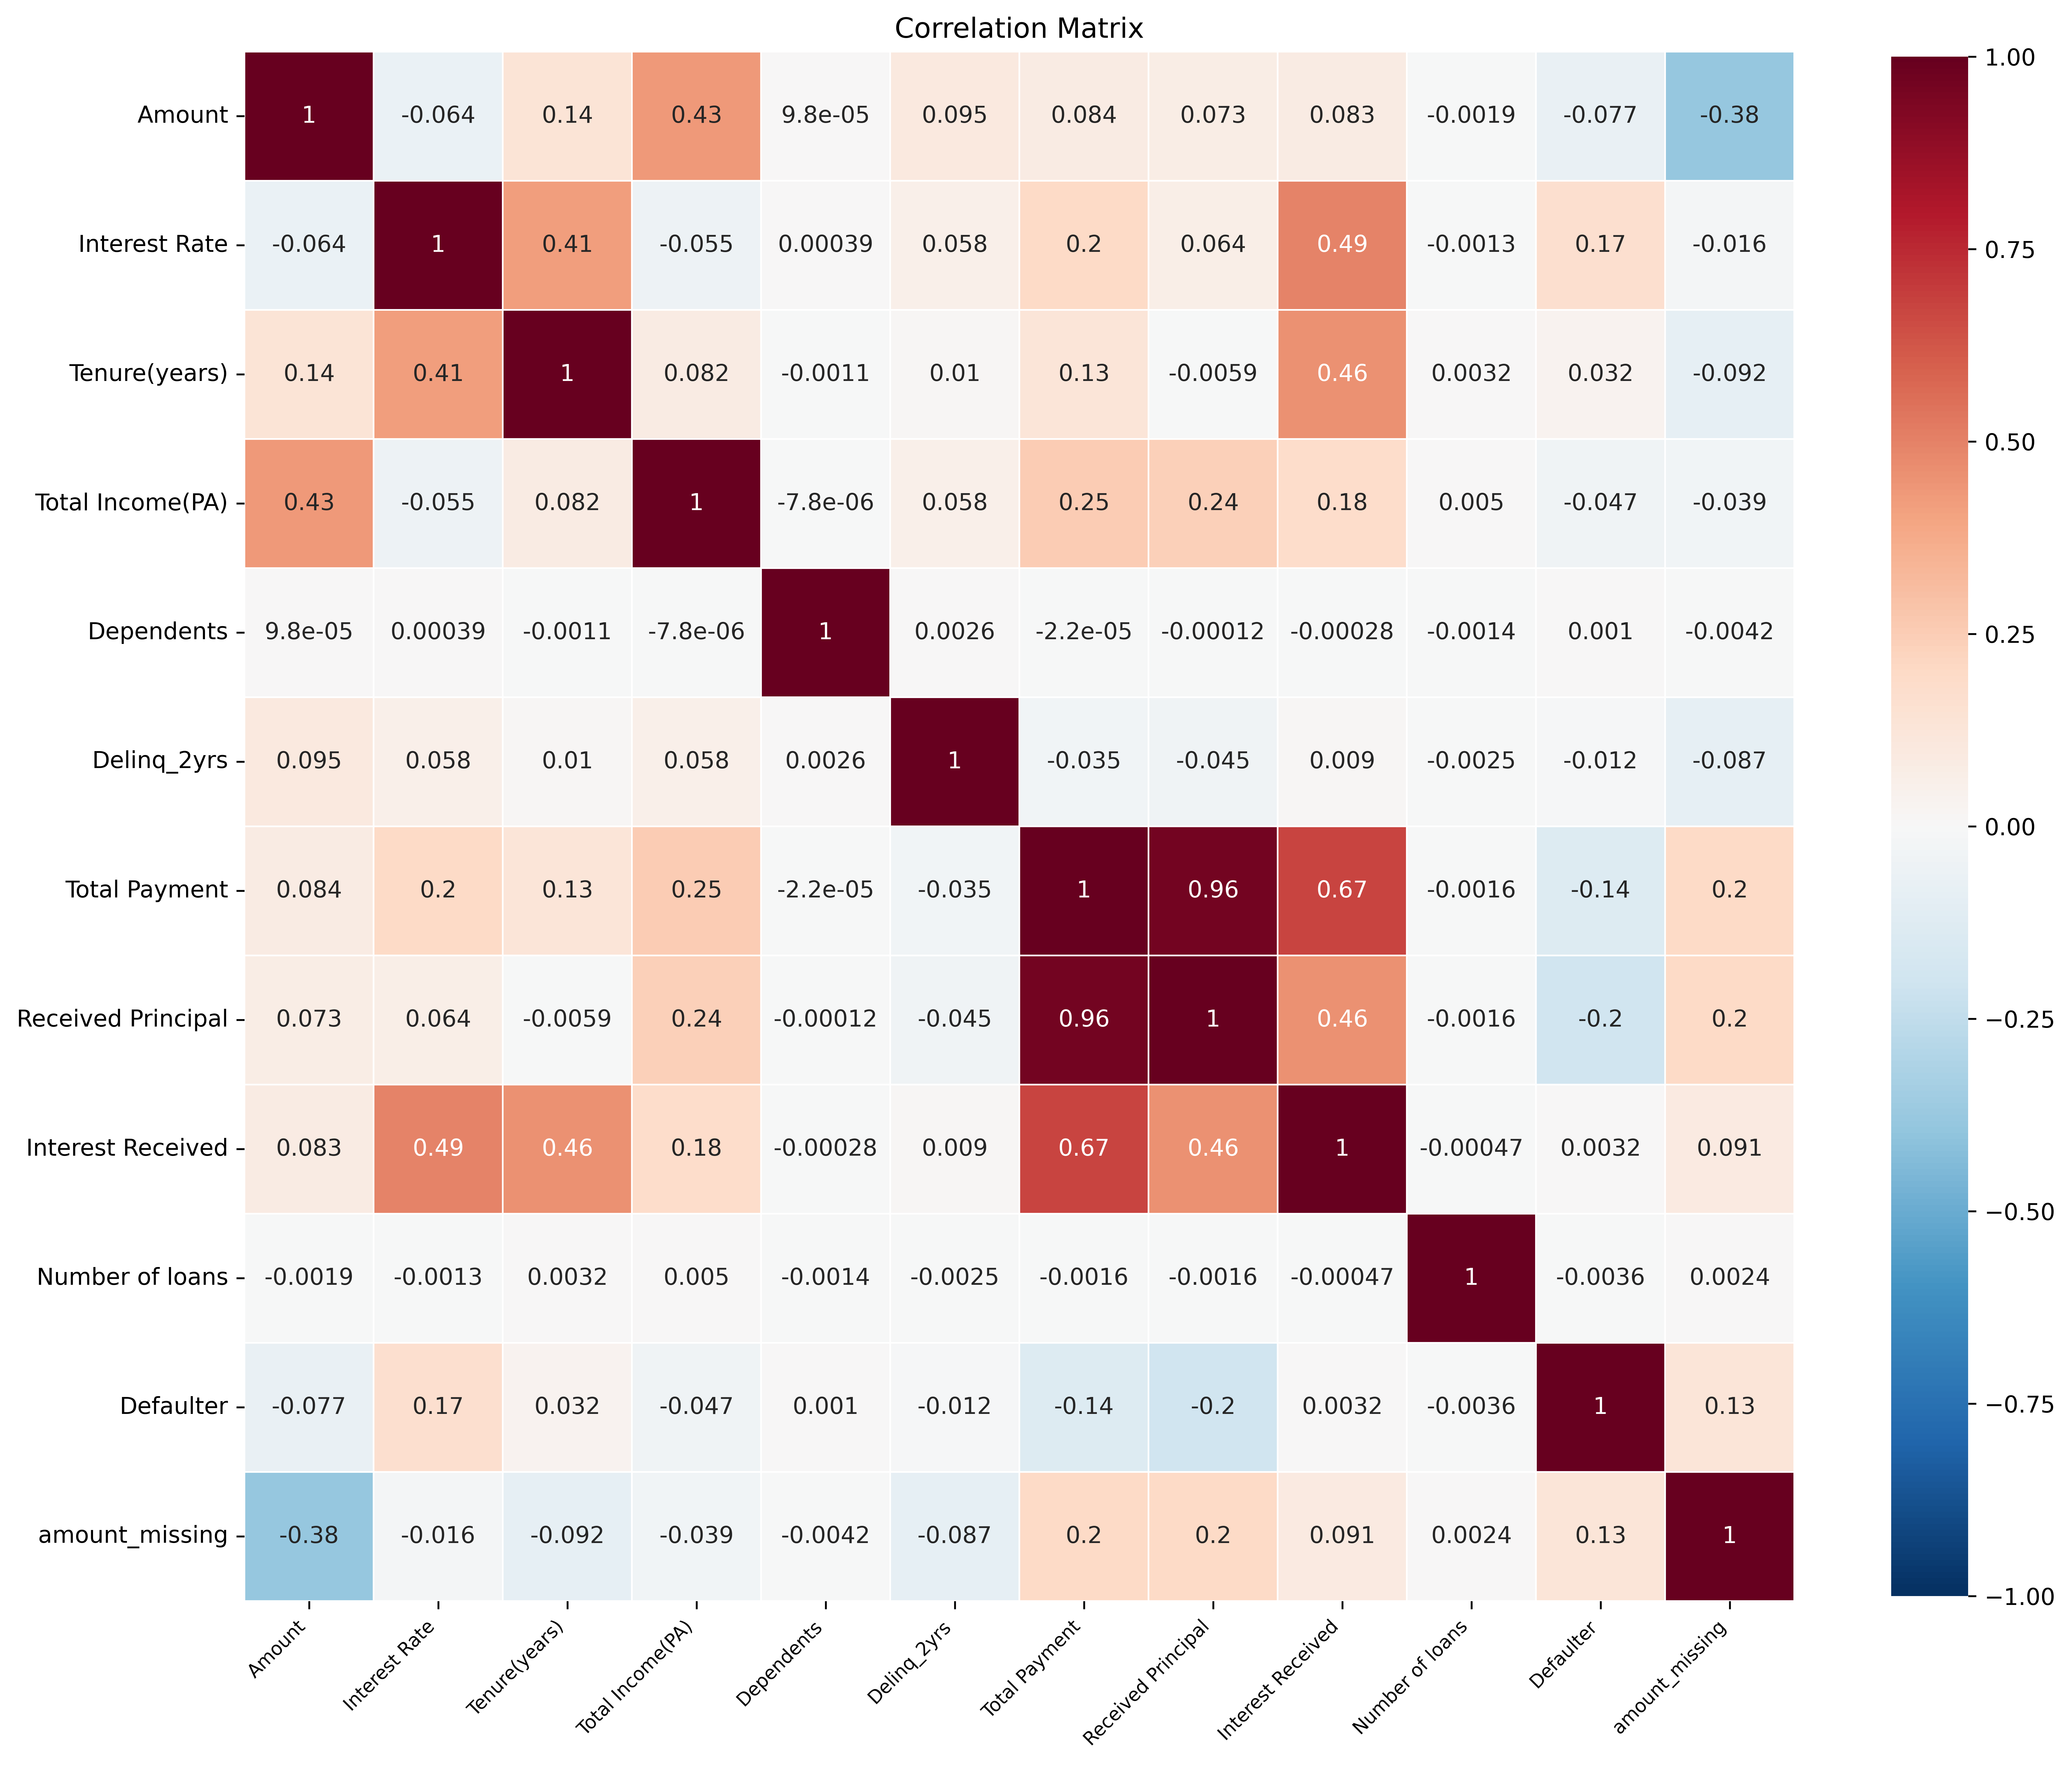

In [18]:
# Multicollinearity is the ocurrence of high intercorrelations among two or more independent variables in a multiple regression mode
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()
plt.figure(figsize=(15,15), dpi=600)
x = sns.heatmap(corr_matrix, square=True, center=0, annot=True, linewidths=.5, cmap="RdBu_r", cbar_kws={'shrink':0.8}, vmin=-1, vmax=1)
x.set_xticklabels(x.get_xticklabels(), rotation=45, fontsize=8, ha='right')
plt.title("Correlation Matrix")
plt.show()

**Observation from the heatmap**
No two variables have high correlation with each other, so there is no issue of multicollinearity. It is safe to use all variables in machine learning model building

**Spearman Correlation Coefficient**
<br>Spearman works best if there are nonlinear relationships between different variables

--------------------------------------------------------------------------------

**We can confirm non-linear relationship between features by looking at pair-wise scatter plots below**
There are non-linear relationships between features, so our decision of going with Spearman was CORRECT.


**Scatter Plots to visualize correlations amongst variables**
The following code generates a scatter plot matrix also known as a pair plot of all numeric features in the input DataFrame using the seaborn library.
The diagonal of the plot matrix shows a histogram of each variable's distribution. This allows for visual inspectino of the pairwise relationships between variables, which canbe useful for identifying patterns, trends, correlations, or potential outliers in the data.

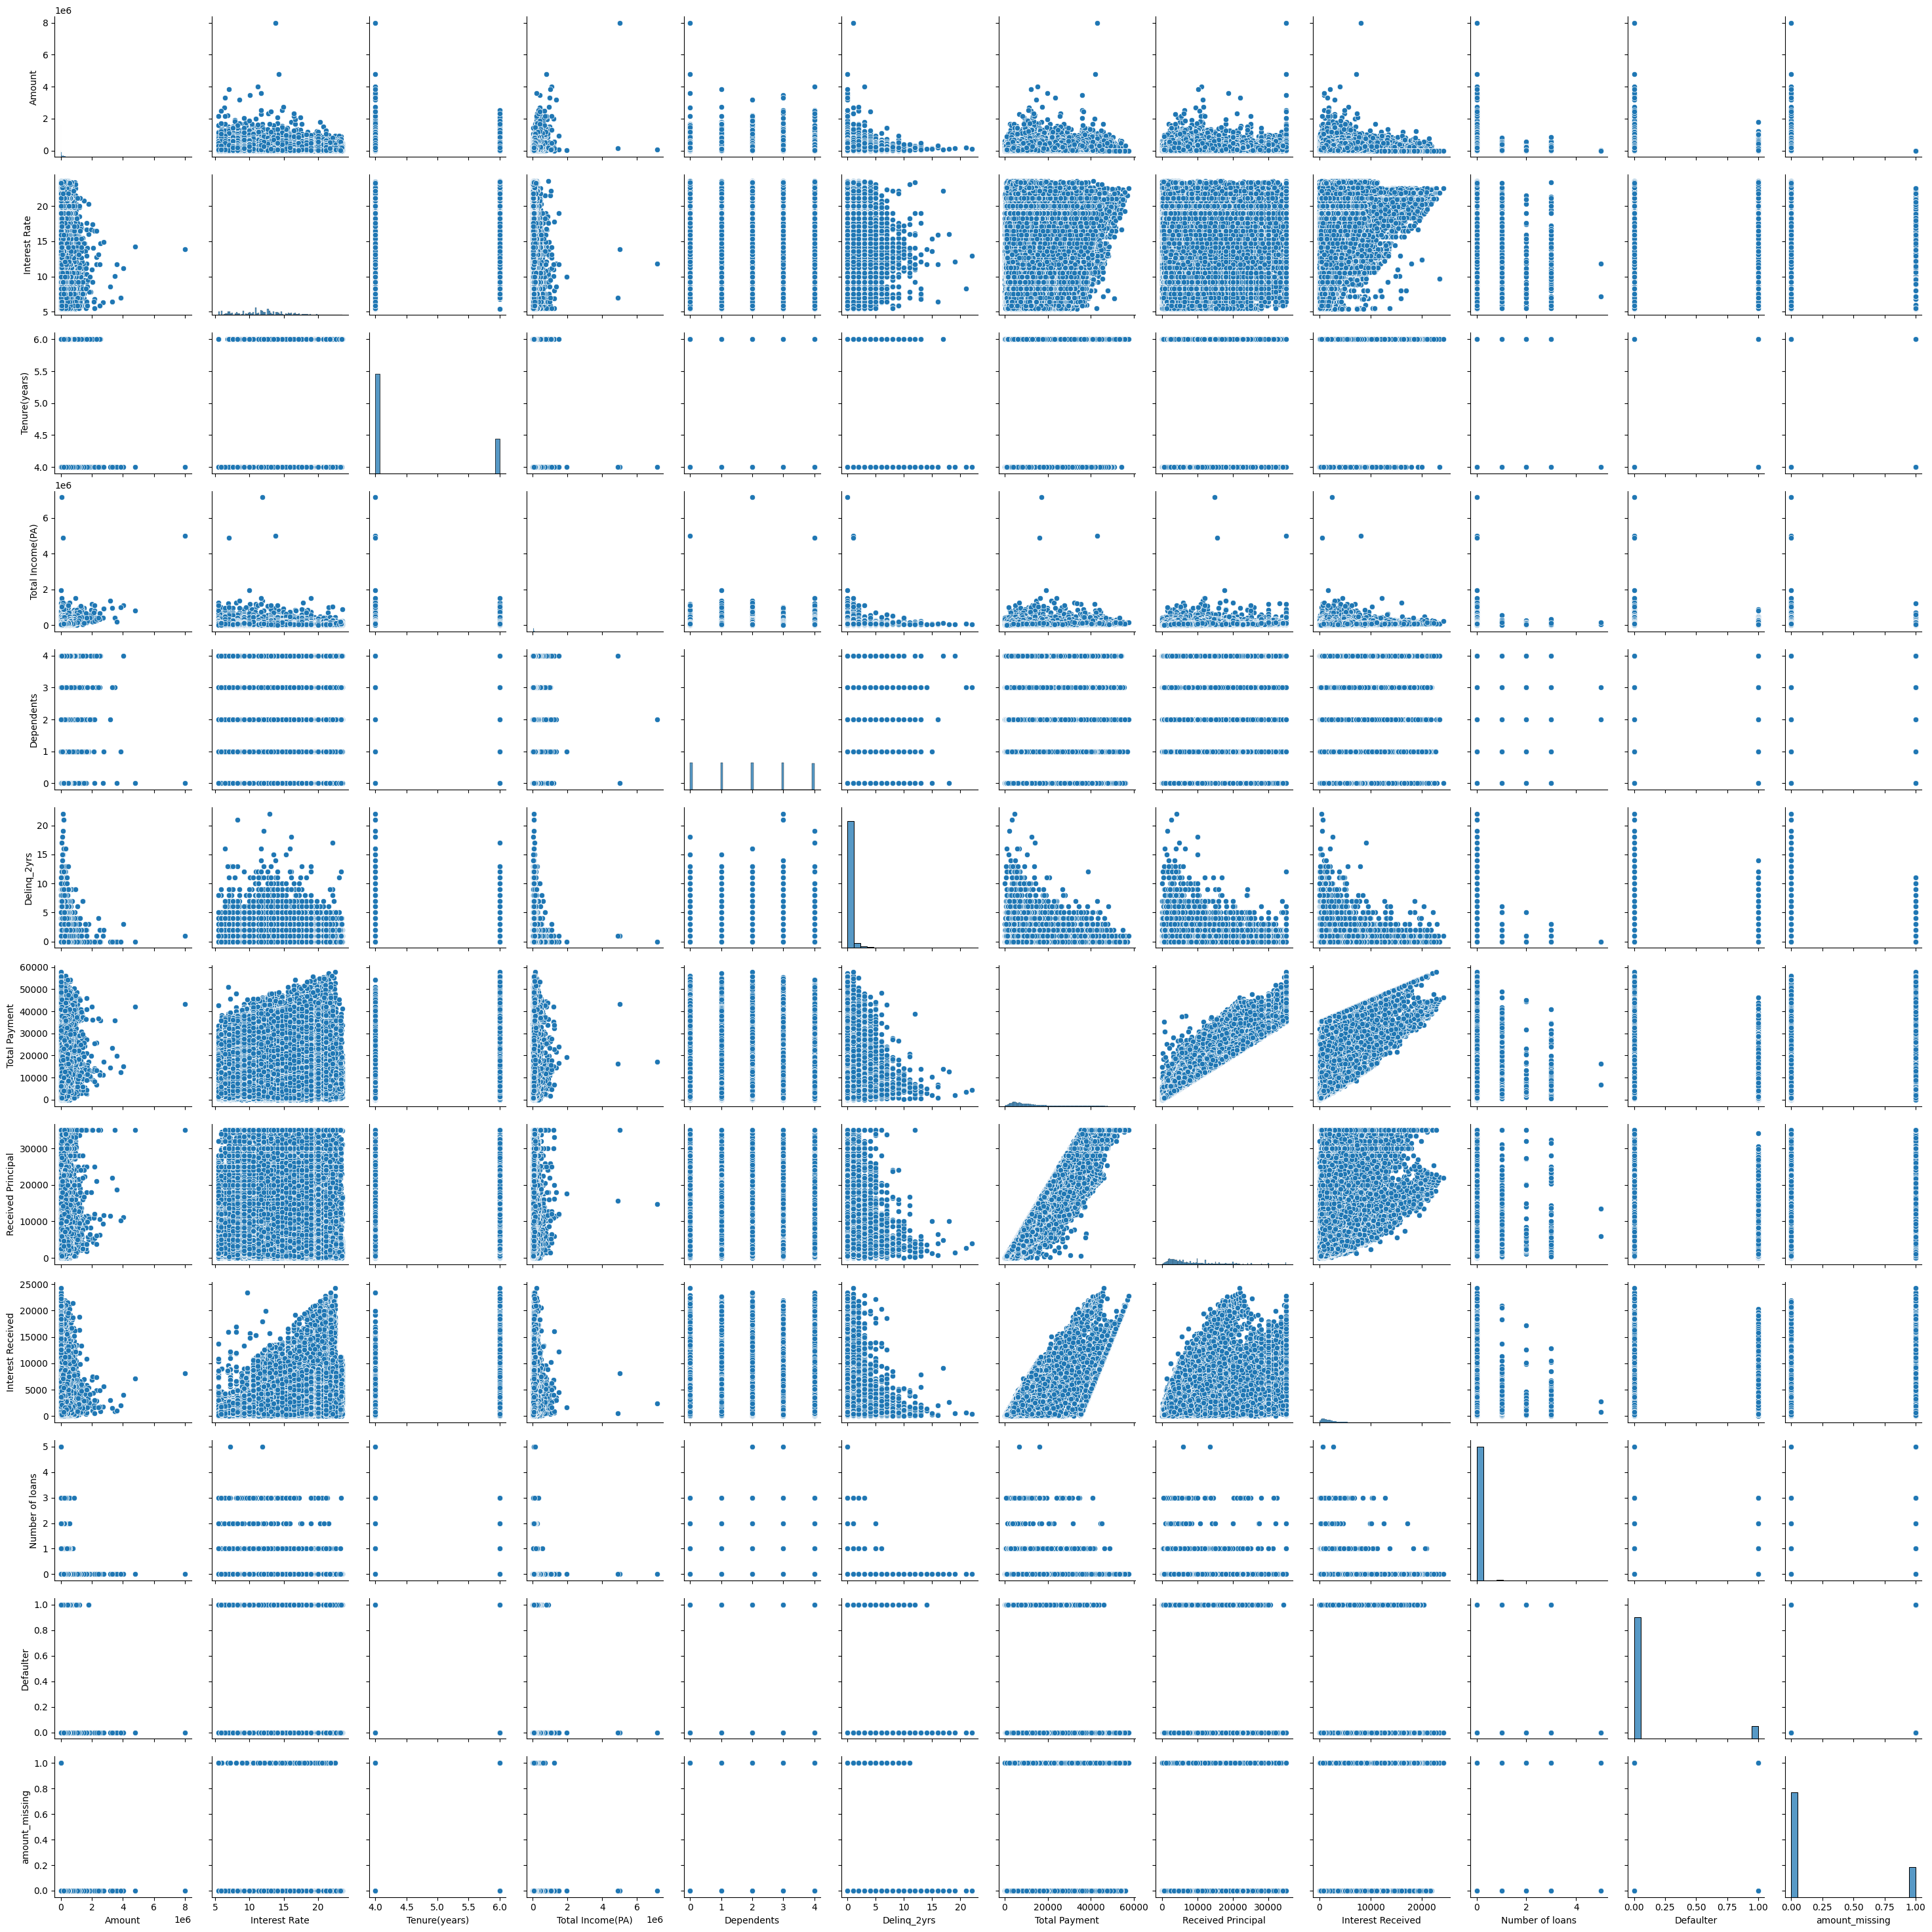

In [19]:
# Plot interaction scatter plots using seaborn

sns.pairplot(df)

# **Understand Skewness**

In [20]:
import plotly.express as px
import numpy as np

In [21]:
# Display features distribution histograms
def Feature_Distributions_Histogram(df):
    # Generate histograms for each column
    for c in df.columns:
        fig = px.histogram(df, x=c, hover_data=df.columns)
        fig.show()
Feature_Distributions_Histogram(df)

Output hidden; open in https://colab.research.google.com to view.

**Skewness**

*   Skewness is a statistical measure that describes the asymmetry or lack of asymmetry in a distribution. It provides insights into the shape of the distribution and the relative positioning of the mean, median and mode.
*   A positive skewness value indicates a right-skewed distribution, where the tail is elongated towards the right A negative skewness value indicates a left-skewed distribution where the tail is elongated towards the left. A skewness value of 0 indicates a symmetric distribution.
*   By quantifying skewness we can gain a numerical understanding of the distrubtion's asymmetry and further analyze its implications in data analysis and modeling.

**How to quantify skewness**
*   Skewness = 3 * mean (mean - median) / standard deviation
--------------------------------------------------------------------------------
**Question to consider**
*   Should we remove outliers/extreme values first and then fix skewness or the other way around?
--------------------------------------------------------------------------------
**Decision**
*   to address the presence  of outliers in skewed data, we'll first correct the skewness
*   One approach mitigating the impact of outliers is by utilizing z-score. The z-score measures how many standard deviations an individual data point is away from the mean. By setting a threshold, such as 3 standard deviations, data points that exceed this threshold can be considered as outliers and subsequently removed from the dataset.

**Let us print skewness in each feature and use log transformation to fix skewness.**

**Note**

It is important no note that there are numerous features in the dataset with a value of 0. to address this issue and normalize the data, we can apply a log transformation specifically to the non-zero values. By taking the logarithm of these values, we can achieve a more symmetric distribution and reduce the impact of extreme values. This transformation can be particularly useful when working with skewed data or variables that exhibit a wide range of values.

Let's only transform features if skewness is in the following range
*   **Skewness <-3 OR Skewness > 3**









In [22]:
# Add all the features to check and fix skewness in features_log array
features_log = ['Amount','Interest Rate','Tenure(years)','Dependents','Total Payment','Received Principal','Interest Received']
def fix_skewness(df, features):
  features_log = features
  for f in features_log:
    sk=df[f].skew()
    print("Initial skewness in feature: ",f," is:", sk)

    if sk>3 or sk<-3:

      Log_Fare = df[f].map(lambda i: np.log(i) if i>0 else 0)
      df[f]= Log_Fare
      print("Final skewness in feature: ",f,"is: ", Log_Fare.skew())
      fig = px.histogram(Log_Fare, x=f)
      fig.show()
  return df
df = fix_skewness(df, features_log)

Output hidden; open in https://colab.research.google.com to view.

## **One-Hot Encoding of Categorical Features and Ordinal Encoding of Ordinal Features**

**Categorical and Ordinal Variables**
<br>Categorical variables refer to variables that represent discrete categories or labels, such as gender (male/female), or product types (A/B/C). These variables do not have a specific numerical order or hierarchy.
<br>On the other hand, ordinal variables also represent discrete categories, but they haven an inherent order or raking associated to them. Examples of ordinal variables include educational level (elementary/middle/high-school/college), employment status (unemployed/part-time/full-time), or customer satisfaction rating (low/medium/high).

### **Categorical Hot-Encoding**

In [23]:
# Add all categorical features for categorical one-hot encoding in categorical_features array
data = df
categorical_features = ['Gender','Married','Home','Social Profile','Loan Category','Employment Type','Is_verified']

# Perform one-hot encoding using pandas get_dummies() function
encoded_data = pd.get_dummies(data, columns=categorical_features)

In [24]:
encoded_data.sample(20)

,Amount,Interest Rate,Tenure(years),Tier of Employment,Work Experience,Total Income(PA),Dependents,Delinq_2yrs,Total Payment,Received Principal,...,Loan Category_Home,Loan Category_Medical,Loan Category_Other,Employment Type_Missing,Employment Type_Salaried,Employment Type_Self - Employeed,Is_verified_Missing,Is_verified_Not Verified,Is_verified_Source Verified,Is_verified_Verified
63760,0.000000,9.62,4,Z,0,104000.0,3,0,11722.704503,10000.00,...,0,0,0,1,0,0,1,0,0,0
91832,9.608714,7.40,4,Z,0,40000.0,1,0,3735.670000,3060.84,...,0,0,0,1,0,0,1,0,0,0
44613,0.000000,9.70,4,Z,0,45000.0,1,0,13400.900000,12000.00,...,0,0,0,1,0,0,0,0,1,0
129040,11.654477,5.86,4,Z,0,36000.0,0,0,6391.860000,6000.00,...,0,0,0,1,0,0,0,0,1,0
67589,11.414055,6.31,4,Z,0,58500.0,0,0,3700.880000,3103.95,...,1,0,0,1,0,0,1,0,0,0
34261,11.263810,13.83,4,Z,0,75000.0,4,0,12256.188609,10000.00,...,0,0,0,1,0,0,0,0,0,1
76059,11.086043,11.19,6,Z,0,73000.0,1,0,2913.180000,1676.72,...,0,0,0,1,0,0,0,0,0,1
49479,0.000000,11.84,4,B,0,22000.0,2,1,2827.215247,2400.00,...,0,0,1,0,1,0,0,0,0,1
8595,10.494713,8.04,4,A,0,58000.0,2,0,22862.283170,20000.00,...,0,0,0,0,1,0,0,0,1,0
32688,8.938138,9.18,4,B,0,21000.0,2,0,6935.110000,6250.00,...,0,0,0,0,1,0,1,0,0,0


### **Ordinal Encoding**

In [40]:
# Define the ordinal features array
ordinal_features=['Tier of Employment', 'Work Experience']

# Define the pandas DataFrame for encoding
data = encoded_data

# Create a custom mapping of categories to numerical  labels
tier_employment_order = list(encoded_data["Tier of Employment"].unique())
tier_employment_order.sort()
work_experience_order = [0,'<1', '1-2','2-3','3-5','5-10','10+']

custom_mapping = [tier_employment_order, work_experience_order]

# Create the function to perform ordinal encoding
# Call the corresponding library and module to import OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder

def perform_ordinal_encoding(data, ordinal_features, custom_mapping):

    # Perform ordinal encoding using OrdinalEncoder with the custom mapping
    encoder = OrdinalEncoder(categories=custom_mapping)
    data[ordinal_features] = encoder.fit_transform(data[ordinal_features])

    # Return the encoded DataFrame
    return data

# Call the function to perform ordinal encoding
data = perform_ordinal_encoding(data, ordinal_features, custom_mapping)

In [41]:
data.head()

,Amount,Interest Rate,Tenure(years),Tier of Employment,Work Experience,Total Income(PA),Dependents,Delinq_2yrs,Total Payment,Received Principal,...,Loan Category_Home,Loan Category_Medical,Loan Category_Other,Employment Type_Missing,Employment Type_Salaried,Employment Type_Self - Employeed,Is_verified_Missing,Is_verified_Not Verified,Is_verified_Source Verified,Is_verified_Verified
0,10.931033,11.84,6,1.0,2.0,125000.0,4,0,1824.150000,971.46,...,0,0,0,0,1,0,1,0,0,0
1,10.924336,16.94,4,3.0,6.0,61000.0,1,0,22912.532998,18000.00,...,0,0,0,0,0,1,0,0,1,0
2,9.416460,11.84,6,7.0,5.0,100000.0,3,0,7800.440000,4489.76,...,0,0,0,1,0,0,1,0,0,0
3,10.286162,14.71,4,7.0,3.0,30000.0,1,0,6672.050000,5212.29,...,0,0,0,1,0,0,1,0,0,0
4,10.317318,14.71,4,7.0,6.0,65000.0,3,0,11793.001345,10000.00,...,0,0,0,1,0,0,0,0,0,1


In [42]:
print(custom_mapping)

[['A', 'B', 'C', 'D', 'E', 'F', 'G', 'Z'], [0, '<1', '1-2', '2-3', '3-5', '5-10', '10+']]


## **Fix Data Imbalance in the Target Variable**

### **Over-Sampling**
Increase the number of instances in the minory class (defaulters) by duplicating existing examples or generating synthetic examples to achieve a balanced dataset.

In [43]:
data['Defaulter'].value_counts()

0    130254
1     13469
Name: Defaulter, dtype: int64

It is not recommended to use SMOTE method or technique when minority class is less than 10%.
<br>To solve imbalance on dependent variable, we will not be proceeding with SMOTEENN method due to minority class being equal to 10.34% of the mayority class, quite close to the limit stated by the above-mentioned recommendation.

In [51]:
# Specify the name of the target variable column
target_column = "Defaulter"

def fix_imbalance_oversampling(dataframe, target_column):

  # Separate the features (x) and the target variable (y, Defaulter)
  x = dataframe.drop(target_column, axis=1)
  y = dataframe[target_column]

  # Call the corresponding library and module for RandomOverSampler
  from imblearn.over_sampling import RandomOverSampler

  # Apply random over-sampling
  oversampler = RandomOverSampler(random_state=42)
  x, y = oversampler.fit_resample(x,y)

  return x, y

x, y = fix_imbalance_oversampling(data, target_column)

## **Split Data in Training, Validation, and Testing datasets**

In [54]:
from sklearn.model_selection import train_test_split

# The test_size parameter is set to 0.2, indicating that 20% of the data will be allocated to the testing set, while the remaining 80% will be used for training.
# The random_state is set to 42 to ensure reproducibility of the split, meaning that the same random split will be obtained each time the code is executed.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## **Import Packages**

In [60]:
from sklearn.metrics import mean_absolute_error
import xgboost as xgb

# Hyperparameter tuning
from hyperopt import fmin, tpe, hp, STATUS_OK
from hyperopt.pyll import scope

import neptune
import time
from neptune.integrations.xgboost import NeptuneCallback

import pickle
from sklearn.metrics import classification_report, confusion_matrix

### **Configure Neptune**

In [61]:
# Configure Neptune
run = neptune.init_run(
    project="chapa90/loan-default-predictor",
    api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiIxYjYyN2Q0Ny1lNDJjLTRkOGUtYTc3Zi0xNGE0YjlhODk0NjIifQ==",
)  # your credentials

# Creating a NeptuneCallBack object to integrate Neptune with XGBoost
neptune_callback = NeptuneCallback(run=run, log_tree=[0,1,2,3])

<ipython-input-61-78230b777779>:2: NeptuneWarning:

The following monitoring options are disabled by default in interactive sessions: 'capture_stdout', 'capture_stderr', 'capture_traceback', and 'capture_hardware_metrics'. To enable them, set each parameter to 'True' when initializing the run. The monitoring will continue until you call run.stop() or the kernel stops. Also note: Your source files can only be tracked if you pass the path(s) to the 'source_code' argument. For help, see the Neptune docs: https://docs.neptune.ai/logging/source_code/



https://app.neptune.ai/chapa90/loan-default-predictor/e/LOAN-1


### **Model training with hyperopt**
--------------------------------------------------------------------------------
*   **Boosting Parameters**: Control the gradient descent process in boosting.
*   **Tree Hyperparameters**: Influence the construction of decision trees.
*   **Stochastic Parameters**: Determine the subsampling of training data during model building.
*   **Regularization Parameters**: Regulate model complexity to provent overfitting.
--------------------------------------------------------------------------------




In [62]:
# Define search space for hyperparameters tuning of xgboost model.
search_space = {
    'learning_rate': hp.loguniform('learning_rate', -7, 0),
    'max_depth': scope.int(hp.uniform('max_depth', 1, 100)),
    'min_child_weight': hp.loguniform('min_child_weight', -2, 3),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
    'gamma': hp.loguniform('gamma', -10, 10),
    'alpha': hp.loguniform('alpha', -10, 10),
    'lambda': hp.loguniform('lambda', -10, 10),
    'objective': 'binary:logistic',
    'eval_metric': 'error',
    'seed': 123,
}


#Defining a function named 'train_model' that takes 'params' as input.
def train_model_xgboost(params, neptune_callback, x_train, y_train, x_test, y_test):
    start_time = time.time()

    model = xgb.XGBClassifier(params=params, num_boost_round=5000, verbose_eval=False, callbacks=[neptune_callback])

    run_time = time.time() - start_time

    model.fit(x_train, y_train)

    predictions_test = model.predict(x_test)
    mae = mean_absolute_error(y_test, predictions_test)

    return {'status': STATUS_OK, 'loss': mae}

# Finding the best hyperparameters using Hyperopt's fmin function.
best_params = fmin(
    fn=lambda params: train_model_xgboost(params, neptune_callback, x_train, y_train, x_test, y_test),
    space=search_space,
    algo=tpe.suggest,
    max_evals=15,
    rstate=np.random.default_rng(123)
)
run.stop()

# Let's print the params
print(best_params)

  0%|          | 0/15 [00:00<?, ?trial/s, best loss=?]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[02:25:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round", "params", "verbose_eval" } are not used.





  7%|▋         | 1/15 [00:22<05:18, 22.77s/trial, best loss: 0.03901961536985145]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[02:25:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round", "params", "verbose_eval" } are not used.





 13%|█▎        | 2/15 [00:38<04:01, 18.57s/trial, best loss: 0.03901961536985145]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[02:26:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round", "params", "verbose_eval" } are not used.





 20%|██        | 3/15 [00:53<03:25, 17.10s/trial, best loss: 0.03901961536985145]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[02:26:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round", "params", "verbose_eval" } are not used.





 27%|██▋       | 4/15 [01:11<03:09, 17.26s/trial, best loss: 0.03901961536985145]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[02:26:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round", "params", "verbose_eval" } are not used.





 33%|███▎      | 5/15 [01:27<02:48, 16.85s/trial, best loss: 0.03901961536985145]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[02:26:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round", "params", "verbose_eval" } are not used.





 40%|████      | 6/15 [01:43<02:28, 16.53s/trial, best loss: 0.03901961536985145]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[02:27:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round", "params", "verbose_eval" } are not used.





 47%|████▋     | 7/15 [01:59<02:12, 16.56s/trial, best loss: 0.03901961536985145]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[02:27:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round", "params", "verbose_eval" } are not used.





 53%|█████▎    | 8/15 [02:18<02:00, 17.18s/trial, best loss: 0.03901961536985145]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[02:27:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round", "params", "verbose_eval" } are not used.





 60%|██████    | 9/15 [02:34<01:40, 16.76s/trial, best loss: 0.03901961536985145]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[02:27:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round", "params", "verbose_eval" } are not used.





 67%|██████▋   | 10/15 [02:50<01:22, 16.48s/trial, best loss: 0.03901961536985145]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[02:28:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round", "params", "verbose_eval" } are not used.





 73%|███████▎  | 11/15 [03:05<01:05, 16.29s/trial, best loss: 0.03901961536985145]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[02:28:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round", "params", "verbose_eval" } are not used.





 80%|████████  | 12/15 [03:24<00:51, 17.10s/trial, best loss: 0.03901961536985145]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[02:28:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round", "params", "verbose_eval" } are not used.





 87%|████████▋ | 13/15 [03:42<00:34, 17.22s/trial, best loss: 0.03901961536985145]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[02:29:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round", "params", "verbose_eval" } are not used.





 93%|█████████▎| 14/15 [04:00<00:17, 17.46s/trial, best loss: 0.03901961536985145]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[02:29:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round", "params", "verbose_eval" } are not used.





100%|██████████| 15/15 [04:20<00:00, 17.37s/trial, best loss: 0.03901961536985145]
Shutting down background jobs, please wait a moment...
Done!
Waiting for the remaining 6 operations to synchronize with Neptune. Do not kill this process.
All 6 operations synced, thanks for waiting!
Explore the metadata in the Neptune app:
https://app.neptune.ai/chapa90/loan-default-predictor/e/LOAN-1/metadata
{'alpha': 10097.8429974375, 'colsample_bytree': 0.9941458252246209, 'gamma': 4995.254471659089, 'lambda': 6.390134508060656e-05, 'learning_rate': 0.09100767117912448, 'max_depth': 29.65059937692005, 'min_child_weight': 0.1765314436877681, 'subsample': 0.6246406667012787}


### **Best Fit XGBoost Model**

In [64]:
# Access the best hyperparameters
best_hyperparams = {k: best_params[k] for k in best_params}

# Train the final XGBoost model with the best hyperparameters
final_model = xgb.XGBClassifier(
    max_depth=int(best_hyperparams['max_depth']),
    learning_rate=best_hyperparams['learning_rate'],
    gamma=best_hyperparams['gamma'],
    subsample=best_hyperparams['subsample'],
    colsample_bytree=best_hyperparams['colsample_bytree'],
    min_child_weight=best_hyperparams['min_child_weight'],
    random_state=42,
    tree_method='hist', enable_categorical=True
)

# Train the final model on the entire dataset
final_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9941458252246209, device=None,
              early_stopping_rounds=None, enable_categorical=True,
              eval_metric=None, feature_types=None, gamma=4995.254471659089,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.09100767117912448,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=29, max_leaves=None,
              min_child_weight=0.1765314436877681, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [82]:
# Save the trained XGBoost model to a file
model_filename = '/content/gdrive/MyDrive/ML Projects/Loan Default Prediction Using ML Models/xgboost_model.pkl'
pickle.dump(final_model, open(model_filename, 'wb'))
print(f"XGboost model saved to {model_filename}")

XGboost model saved to /content/gdrive/MyDrive/ML Projects/Loan Default Prediction Using ML Models/xgboost_model.pkl


### **Predictions**

In [69]:
# Make predictions with the test data
y_pred = final_model.predict(x_test)

# Print Classification Report metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.81      0.79     25937
           1       0.80      0.76      0.78     26165

    accuracy                           0.78     52102
   macro avg       0.79      0.78      0.78     52102
weighted avg       0.79      0.78      0.78     52102

Confusion Matrix:
[[21023  4914]
 [ 6300 19865]]


## **Model Training: Random Forest**

### **Random Forest Grid Search**

In [72]:
# Import the corresponding library and module for GridSearchCV and RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}


# Create a function that will perform grid search on random forest model and return the best params of the model
def random_forest_classifier_grid_search(param_grid, x_train, y_train):

  # Create a random forest classifier
  rf = RandomForestClassifier()

  # Perform grid search with cross-validation
  grid_search = GridSearchCV(rf, param_grid, cv=2, scoring='accuracy')
  grid_search.fit(x_train, y_train)

  # Print the best parameters found
  return grid_search.best_params_

best_parameters = random_forest_classifier_grid_search(param_grid, x_train, y_train)
best_parameters

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}

### **Model Validation: Random Forest**

In [74]:
# Access the best hyperparameters
best_hyperparams_rf = {k: best_parameters[k] for k in best_parameters}

# Train the Random Forest with the best hyperparameters
final_model_rf = RandomForestClassifier(
    max_depth=best_hyperparams_rf['max_depth'],
    min_samples_split=best_hyperparams_rf['min_samples_split'],
    n_estimators=best_hyperparams_rf['n_estimators']
)

# Train the final model on the entire dataset
final_model_rf.fit(x_train, y_train)

# Make predictions on the test data
y_pred_rf=final_model_rf.predict(x_test)

# Print Classification Report metrics
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Print Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     25937
           1       0.99      1.00      1.00     26165

    accuracy                           1.00     52102
   macro avg       1.00      1.00      1.00     52102
weighted avg       1.00      1.00      1.00     52102

Confusion Matrix:
[[25766   171]
 [    0 26165]]


In [83]:
# Save the trained Random Forest model to a file
model_filename_rf = '/content/gdrive/MyDrive/ML Projects/Loan Default Prediction Using ML Models/random_forest_model.pkl'
pickle.dump(final_model_rf, open(model_filename_rf, 'wb'))
print(f"Random Forest model saved to {model_filename_rf}")

Random Forest model saved to /content/gdrive/MyDrive/ML Projects/Loan Default Prediction Using ML Models/random_forest_model.pkl
